# Normal Distribution

## Exercise 3.8, p. 159 - CAPM

The Capital Asset Pricing Model (CAPM) is a financial model that assumes returns
on a portfolio are normally distributed. Suppose a portfolio has an average annual return of 14.7%
(i.e. an average gain of 14.7%) with a standard deviation of 33%. A return of 0% means the
value of the portfolio doesn’t change, a negative return means that the portfolio loses money, and
a positive return means that the portfolio gains money.<br/><br/>
(a) What percent of years does this portfolio lose money, i.e. have a return less than 0%?<br/>
(b) What is the cutoff for the highest 15% of annual returns with this portfolio?<br/>
<br/>
µ = 0.147<br/>
σ = 0.33

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
mean = 0.147
stdev = 0.33

To determine the percentage of years where the portfolio loses money, we are looking for years with a return of less than 0%. We do this by calculating how many standard deviations below the mean is 0.00. That value is called the z-score. From the z-score, we can determine the probability of that scenario occurring, either by looking it up in a table, or using a software library.

z = (0.00 - mean)/stddev

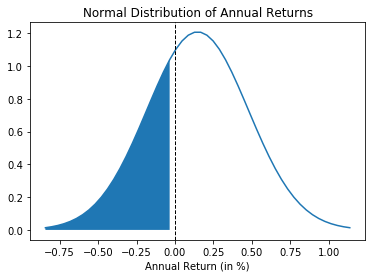

In [3]:
x = np.linspace(mean - 3*stdev, mean + 3*stdev, 50)
plt.plot(x,st.norm.pdf(x, mean, stdev))
plt.xlabel('Annual Return (in %)')
plt.title('Normal Distribution of Annual Returns')
plt.axvline(0, color='k', linestyle='dashed', linewidth=1)
fill_area = x[np.where(x<0)]
plt.fill_between(fill_area,st.norm.pdf(fill_area, mean, stdev),0)
plt.show()

In [4]:
z = (0.00 - mean)/stdev
z

-0.44545454545454544

In [5]:
p = st.norm.cdf(z)
p

0.3279956507031998

In [6]:
print("In {:03.2f}% of years, the portfolio loses money.".format(p*100))

In 32.80% of years, the portfolio loses money.


To determine the cutoff for the highest 15% of annual returns with this portfolio, we need to determine at which point in the distribution do 85% of the annual returns fall below. We need to calculate the z-score from a p-score of 0.85:

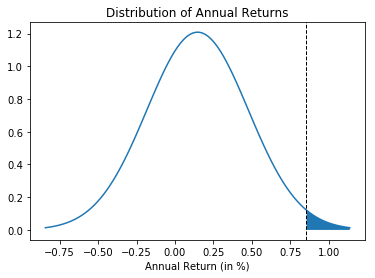

In [7]:
x = np.linspace(mean - 3*stdev, mean + 3*stdev, 100)
plt.plot(x,st.norm.pdf(x, mean, stdev))
plt.xlabel('Annual Return (in %)')
plt.title('Distribution of Annual Returns')
plt.axvline(0.85, color='k', linestyle='dashed', linewidth=1)
fill_area = x[np.where(x>0.85)]
plt.fill_between(fill_area,st.norm.pdf(fill_area, mean, stdev),0)
plt.show()

In [8]:
z = st.norm.ppf(0.85)
z

1.0364333894937898

Now that we know the z-score, the mean and the standard deviation, we can solve for x:

z = (x - µ) / σ

thus

x = (z * σ) + µ

In [9]:
x = (z * stdev) + mean
x

0.4890230185329506

In [10]:
print("The cutoff for the highest 15% of annual returns, was a return of {:03.1f}%.".format(x*100))

The cutoff for the highest 15% of annual returns, was a return of 48.9%.


# Evaluating the Normal Approximation

## Exercise 3.1.7, p. 161 - Scores on stats final

Below are final exam scores of 20 Introductory Statistics students:

57,66,69,71,72,73,74,77,78,78,79,79,81,81,82,83,83,88,89,94

(a) The mean score is 77.7 points. with a standard deviation of 8.44 points. Use this information
to determine if the scores approximately follow the 68-95-99.7% Rule.

(b) Do these data appear to follow a normal distribution? Explain your reasoning using the graphs
provided below.

In [11]:
scores = np.array([57,66,69,71,72,73,74,77,78,78,79,79,81,81,82,83,83,88,89,94])

In [12]:
n = scores.size
n

20

In [13]:
mean = 77.7
mean

77.7

In [14]:
stdev = 8.44
stdev

8.44

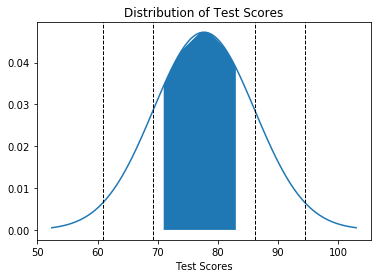

In [15]:
x = np.linspace(mean - 3*stdev, mean + 3*stdev, 100)
plt.plot(x,st.norm.pdf(x, mean, stdev))
plt.xlabel('Test Scores')
plt.title('Distribution of Test Scores')
plt.axvline(mean - stdev, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean + stdev, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean - 2*stdev, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean + 2*stdev, color='k', linestyle='dashed', linewidth=1)
fill_area1 = scores[np.where(np.logical_and(scores>mean-stdev, scores<mean+stdev))]
plt.fill_between(fill_area1,st.norm.pdf(fill_area1, mean, stdev),0)
plt.show()

In [16]:
print("There are {} scores. Are 68% of them between {:04.2f} and {:04.2f}?".format(n,mean-stdev,mean+stdev))
print("68% of {:d} is {:d}".format(n,round(0.68*n)))

There are 20 scores. Are 68% of them between 69.26 and 86.14?
68% of 20 is 14


In [17]:
scores[np.where(np.logical_and(scores>mean-stdev, scores<mean+stdev))].size

14

Therefore, 68% of the scores are within 1 standard deviation of the mean.

In [18]:
print("Are 95% of the scores between {:04.2f} and {:04.2f}?".format(mean-2*stdev,mean+2*stdev))
print("95% of {:d} is {:d}".format(n,round(0.95*n)))

Are 95% of the scores between 60.82 and 94.58?
95% of 20 is 19


In [19]:
scores[np.where(np.logical_and(scores>mean-2*stdev, scores<mean+2*stdev))].size

19

Therefore, 95% of the scores are within 2 standard deviations of the mean.

In [20]:
print("Are 99.7% of the scores between {:04.2f} and {:04.2f}?".format(mean-3*stdev,mean+3*stdev))
print("99.7% of {:d} is {:d}".format(n,round(0.997*n)))

Are 99.7% of the scores between 52.38 and 103.02?
99.7% of 20 is 20


In [21]:
scores[np.where(np.logical_and(scores>mean-3*stdev, scores<mean+3*stdev))].size

20

Therefore, 99.7% of the scores are within 3 standard deviations of the mean. We can now say that the scores follow the 68-95-99.7% Rule

Based on the graphs in the text book which illustrate the test score data, I believe it is fair to say that the data follows a normal distribution. 

Despite a small gap on the left, the histogram is fairly symmetric, with the majority of the values concentrated in the middle and they thin out on the right and left tails. The gap could be attributed to the small number of observations in our sample.

In the normal probability plot, the majority of the observations lie close to the line.

These observations about the 2 plots describe what we would expect to see in normally distributed data.

# Binomial Distribution

## Exercise 3.3.1, p. 164 - Game of dreidel

A dreidel is a four-sided spinning top with the Hebrew letters nun, gimel, hei, and shin, one on each side. Each side is equally likely to come up in a single spin of the dreidel. Suppose you spin a dreidel three times. Calculate the probability of getting:<br/><br/>
(a) at least one nun?<br/>
(b) exactly 2 nuns?<br/>
(c) exactly 1 hei?<br/>
(d) at most 2 gimels?

<b>(a) at least one nun?</b><br/>
<br/>
To determine the probability of getting <u>AT LEAST</u> one nun in three spins, we can first use the binomial distribution to determine the probability of never getting a nun. The complementary probability of that result will be the probability of getting at least one nun.<br/>
<br/>
Since we are trying to calculate the probability of not getting a nun, we will define "success" as not getting a nun and "failure" as getting a nun.<br/>
<br/>
For a single spin, the probability of success (not getting a nun) is 0.75 (¾)<br/>
<br/>
Our outcome of interest is getting k=3 successes in n=3 trials (spins). Thus the probability of never getting a nun is calculated as follows:<br/>
<br/>
<pre>
   3!
-------- * (0.75)^3 * (1-0.75)^(3-3)
3!(3-3)!

= 1 * 0.42 * 1

= 0.42
</pre>

If the probability of not getting a nun is 0.42, then the probability of getting at least 1 nun is 1 - 0.42 = 0.58.

<b>(b) exactly 2 nuns?</b><br/>
<br/>
To determine the probability of getting <u>EXACTLY</u> 2 nuns in 3 spins, we will define success as getting a nun and failure as not getting a nun.<br/>
<br/>
For a single spin, the probability of getting a nun is 0.25 (¼)<br/>
<br/>
Our outcome of interest is getting k=2 successes in n=3 trials (spins). Thus the probability of getting exactly 2 nuns is calculated as follows:
<pre>
   3!
-------- * (0.25)^2 * (1-0.25)^(3-2)
2!(3-2)!

= 3 * 0.06 * 0.75

= 0.14
</pre>

Therefore, the probability of getting exactly 2 nuns in 3 spins in 0.14.

<b>(c) exactly 1 hei?</b><br/>
<br/>
To determine the probability of getting <u>EXACTLY</u> 1 hei in 3 spins, we will define success as getting a hei and failure as not getting a hei.<br/>
<br/>
For a single spin, the probability of getting a hei is 0.25 (¼)<br/>
<br/>
Our outcome of interest is getting k=1 success in n=3 trials (spins). Thus the probability of getting exactly 1 hei is calculated as follows:
<pre>
   3!
-------- * (0.25)^1 * (0.75)^(3-1)
1!(3-1)!

= 3 * 0.25 * 0.56

= 0.42
</pre>

Therefore, the probability of getting exactly 1 hei in 3 spins is 0.42.

<b>(d) at most 2 gimels</b><br/>
<br/>
To determine the probability of getting <u>AT MOST</u> 2 gimels in 3 spins, we will calculate the probability of getting exactly 3 gimels in 3 spins. The complimentary probability of that result will be the probability of getting at most 2 gimels in 3 spins.<br/>
<br/>
For a single spin, the probability of getting a gimel is 0.25 (¼)<br/>
<br/>
Our outcome of interest is getting k=3 successes in n=3 trials (spins). Thus the probability of spinning 3 gimels is:
<pre>
   3!
-------- * (0.25)^3 * (1-0.25)^(3-3)
3!(3-3)!

= 1 * 0.02 * 1

= 0.02
</pre>

If the probability of getting 3 gimels is 0.02, then the probability of getting at most 2 gimels is 1 - 0.02 = 0.98.

# More Discrete Distributions

## Exercise 3.4.1, p.166 - Sampling at school

For a sociology class project you are asked to conduct a survey on 20 students at your school. You decide to stand outside of your dorm’s cafeteria and conduct the survey on a random sample of 20 students leaving the cafeteria after dinner one evening. Your dorm is comprised of 45% males and 55% females.<br/>
<br/>
(a) Which probability model is most appropriate for calculating the probability that the 4th person
you survey is the 2nd female? Explain.<br/>
<br/>
(b) Compute the probability from part (a).<br/>
<br/>
(c) The three possible scenarios that lead to 4th person you survey being the 2nd female are<br/>
{M, M, F, F}, {M, F, M, F}, {F, M, M, F}<br/>
<br/>
One common feature among these scenarios is that the last trial is always female. In the first
three trials there are 2 males and 1 female. Use the binomial coefficient to confirm that there
are 3 ways of ordering 2 males and 1 female.<br/>
<br/>
(d) Use the findings presented in part (c) to explain why the formula for the coefficient for the
negative binomial is C(n−1, k-1) while the formula for the binomial coefficient is C(n,k)

<b>(a) Which probability model is most appropriate for calculating the probability that the 4th person
you survey is the 2nd female? Explain.</b><br/>
<br/>
The negative binomial distribution is most appropriate in this case, because it describes the probability of observing the kth success on the nth trial. A "success" in this example is surveying a female. We want to calculate the probability of the second success occurring on the 4th trial (survey), so k=2 and n=4. This example meets the 4 conditions for negative binomial:

<ol>
    <li>The trials are independent. Surveying a random person has no impact on which random person will be surveyed next.</li>
    <li>Each trial outcome can be deemed a success or a failure - A survey can be deemed a "success" if the subject is a female.</li>
    <li>The probability of success is the same for each trial. The probability of any given subject being female is 0.55.</li>
    <li>The last trial must be a success. In this case, we're looking for a "success" (a female subject) on the "last" (4th) survey.</li>
</ol>

<b>(b) Compute the probability from part (a).</b><br/>
<br/>
n=4, k=2
<pre>

    (n-1)!
------------- * p^k * (1-p)^(n-k)
(k-1)!*(n-k)!

= 3!/2! * (0.55)^2 * (0.45)^2

= 3 * 0.30 * 0.20

= 0.18

</pre>

Therefore, the probability of the 4th person being the 2nd female is 0.18.

<b>(c) The three possible scenarios that lead to 4th person you survey being the 2nd female are {M, M, F, F}, {M, F, M, F}, {F, M, M, F}</b>

<b>One common feature among these scenarios is that the last trial is always female. In the first three trials there are 2 males and 1 female. Use the binomial coefficient to confirm that there are 3 ways of ordering 2 males and 1 female.</b><br/>
<br/>

We are calculating the number of ways to choose k=1 female from n=3 students (2 males, 1 female)

n=3, k=1

<pre>

C(3,1)

      n!
= ---------
  k!*(n-k)!
  
     3!
= --------   
  1!(3-1)!
  
    3 * 2!
= ---------
   1! * 2!
   
= 3
  
</pre>

Therefore, there are 3 ways of picking 1 female and 2 males, before we pick a female in the fourth trial.

<b>(d) Use the findings presented in part (c) to explain why the formula for the coefficient for the
negative binomial is C(n−1, k-1) while the formula for the binomial coefficient is C(n,k)</b><br/>
<br/>
The only difference between the binomial distribution formula and the negative binomial distribution formula is the co-efficient. The co-efficent in both of those formulas represents the number of ways to arrange the successes among the trials. Assuming the same values for n and k, we should expect the negative binomial distribution to have less possible arrangements than the binomial distribution, since the negative binomial distribution expects a particular success to occur in a particular trial. The number of scenarios in which that criteria is met is a subset of the scenarios where we have k successes in n trials.

In the case of binomial distribution, we are measuring the probability of observing exactly k successes in n trials. But it doesn't matter in which trials those successes occur. To calculate the co-efficient, we count the number of ways to arrange exactly k successes among the n trials. Each of those scenarios are equally likely, so once we have counted those scenarios, we multiply the count by the probability of a single scenario to get our final result.

In our sampling at school example, if we only cared about having surveyed 2 females, and we disregard which trial the second female is surveyed, then we would use the binomial distribution. We would include all possible arrangements of males and females where there are exactly 2 females out of 4 subjects. The scenarios would be as follows:

<table>
    <tr><td></td><td>1</td><td>2</td><td>3</td><td>4</td></tr>
    <tr><td>1.</td><td>M</td><td>M</td><td>F</td><td>F</td></tr>
    <tr><td>2.</td><td>M</td><td>F</td><td>M</td><td>F</td></tr>
    <tr><td>3.</td><td>M</td><td>F</td><td>F</td><td>M</td></tr>
    <tr><td>4.</td><td>F</td><td>F</td><td>M</td><td>M</td></tr>
    <tr><td>5.</td><td>F</td><td>M</td><td>F</td><td>M</td></tr>
    <tr><td>6.</td><td>F</td><td>M</td><td>M</td><td>F</td></tr>
</table>

There are C(4,2) = 6 possible scenarios in the binomial distribution. There are exactly 2 females surveyed in each scenario, but there is no guarantee that the the fourth trial in each scenario was a success. In scenarios 3-5, the fourth trial was NOT a success, because a male was surveyed in the fourth trial.

If we INSIST that the fourth trial be a success, then we have to use the negative binomial distribution. In this case, only 3 of the scenarios match our counting criteria:

<table>
    <tr><td>  </td><td>1</td><td>2</td><td>3</td><td>4</td></tr>
    <tr><td>1.</td><td>M</td><td>M</td><td>F</td><td><font color="red"><b><i>F</i></b></font></td></tr>
    <tr><td>2.</td><td>M</td><td>F</td><td>M</td><td><font color="red"><b><i>F</i></b></font></td></tr>
    <tr><td>3.</td><td>M</td><td>F</td><td>F</td><td>M</td></tr>
    <tr><td>4.</td><td>F</td><td>F</td><td>M</td><td>M</td></tr>
    <tr><td>5.</td><td>F</td><td>M</td><td>F</td><td>M</td></tr>
    <tr><td>6.</td><td>F</td><td>M</td><td>M</td><td><font color="red"><b><i>F</i></b></font></td></tr>
</table>

Since we are fixing our fourth trial to be a success, then we are no longer choosing k=2 successes from n=4 trials. We are choosing 1 success from 3 trials, which is the same as k-1 successes from n-1 trials.

## Exercise 3.4.4, p. 167 - Stenographer's typos

A very skilled court stenographer makes one typographical error (typo) per hour on average.<br/>
<br/>
(a) What probability distribution is most appropriate for calculating the probability of a given number of typos this stenographer makes in an hour?<br/>
(b) What are the mean and the standard deviation of the number of typos this stenographer makes?<br/>
(c) Would it be considered unusual if this stenographer made 4 typos in a given hour?<br/>
(d) Calculate the probability that this stenographer makes at most 2 typos in a given hour.

<b>(a) What probability distribution is most appropriate for calculating the probability of a given number of typos this stenographer makes in an hour?</b><br/>
<br/>
The Poisson distribution is most appropriate for this calculation. It is useful for estimating the number of events (typos) in a large population (number of keystrokes) over a unit of time (1 hour).

<b>(b) What are the mean and the standard deviation of the number of typos this stenographer makes?</b><br/>
<br/>

<pre>
λ = Average number of typos per hour.


                        λ^k * е^-λ
P(observing k typos) =  ----------
                            k!
                            

μ = λ
σ = √λ
</pre>

We are given that the average (mean) number of typos per hour is 1, so:

μ = 1<br/>
σ = √1 = 1

<b>(c) Would it be considered unusual if this stenographer made 4 typos in a given hour?</b><br/>
<br/>
Yes it would be considered unusual, because that would be 3 standard deviations above the mean.

<b>(d) Calculate the probability that this stenographer makes AT MOST 2 typos in a given hour.</b><br/>
<br/>
<pre>

                        λ^k * е^-λ
P(observing k events) = ----------
                            k!

        1 * е^-1
P(0) = ----------
           0!
           
= 1/е

= 0.37

        1 * е^-1
P(1) = ----------
           1!
           
= 1/е

= 0.37

        1 * е^-1
P(2) = ----------
           2!
           
= 1/(2*е)

= 0.18

P(0 or 1 or 2) = P(0) + P(1) + P(2)
= 0.37 + 0.37 + 0.18
= 0.92

</pre>

Therefore, the probability that the stenographer makes AT MOST 2 typos is 0.92